In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [73]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [74]:
base = pd.read_csv('/content/gdrive/MyDrive/NaCl/Dataset de entrada/df_MCB_features.csv')

#criar previsores. 
X = base.iloc[:, 0:15].values
#cria classificador onde 0 planta normal e 1 planta com estresse
y = base.iloc[:,15]


In [75]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [76]:

classificador = Sequential()
classificador.add(Dense(units = 15, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 15))
classificador.add(Dropout(0.1))
classificador.add(Dense(units = 15, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
classificador.add(Dropout(0.1))
classificador.add(Dense(units = 10, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
classificador.add(Dropout(0.1))
classificador.add(Dense(units = 15, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
classificador.add(Dropout(0.1))
classificador.add(Dense(units = 1, activation = 'sigmoid'))
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

    

In [77]:
classificador.fit(X_train, y_train, batch_size=10, epochs= 1000)


Epoch 1/1000
83/83 [==============================] - 1s 2ms/step - loss: 0.7641 - binary_accuracy: 0.4988
Epoch 2/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.7126 - binary_accuracy: 0.4952
Epoch 3/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.7593 - binary_accuracy: 0.4879
Epoch 4/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.6988 - binary_accuracy: 0.4831
Epoch 5/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.6913 - binary_accuracy: 0.4976
Epoch 6/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.6921 - binary_accuracy: 0.5229
Epoch 7/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.6947 - binary_accuracy: 0.5133
Epoch 8/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.6913 - binary_accuracy: 0.4843
Epoch 9/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.6930 - binary_accuracy: 0.4891
Epoch 10/1000
83/83 [================

In [78]:
predict = classificador.predict(X_test)
predict = predict > 0.5

precisao = accuracy_score(y_test, predict)

print(predict)


7/7 [==============================] - 0s 2ms/step
0.5096153846153846


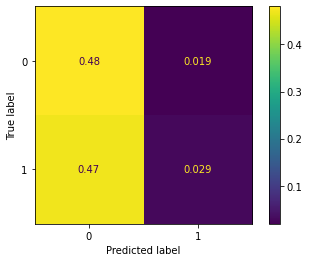

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, predict,  normalize='all')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()